In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as sts
from scipy import stats
from scipy.stats import linregress
from api_keys import weather_api_key as api_key

In [2]:
income_df = pd.read_csv('Resources/clean_income_data.csv')
age_df = pd.read_csv('Resources/clean_age_data.csv')
avocado_df = pd.read_csv('Resources/clean_avocado.csv')

In [3]:
avocado_df['region'].unique()
city_split_df = avocado_df['region'].str.split(",", n = 1, expand = True)
avocado_df['City'] = city_split_df[0]
avocado_df['State'] = city_split_df[1]
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,City,State
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,"Albany, NY",Albany,NY
1,1/11/2015,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,"Albany, NY",Albany,NY
2,1/18/2015,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,"Albany, NY",Albany,NY
3,1/25/2015,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,"Albany, NY",Albany,NY
4,2/1/2015,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,"Albany, NY",Albany,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,11/4/2018,1.49,8300.71,152.99,521.23,0.00,7626.49,6953.34,673.15,0.0,organic,2018,"Tampa, FL",Tampa,FL
14756,11/11/2018,1.54,9113.31,136.55,670.58,0.00,8306.18,7048.18,1258.00,0.0,organic,2018,"Tampa, FL",Tampa,FL
14757,11/18/2018,1.52,12259.52,220.91,1231.73,0.00,10806.88,7333.34,3473.54,0.0,organic,2018,"Tampa, FL",Tampa,FL
14758,11/25/2018,1.24,710.36,52.13,25.74,0.00,632.49,567.77,64.72,0.0,organic,2018,"Tampa, FL",Tampa,FL


In [4]:
income_df = income_df[['Year', 'City', 'Median Income']]

In [5]:
income_df = income_df.drop_duplicates()
income_df

,Year,City,Median Income
0,2018,"Albany, NY",45500
1,2017,"Albany, NY",43790
2,2016,"Albany, NY",42335
3,2015,"Albany, NY",40949
24,2018,"Atlanta, GA",65345
...,...,...,...
939,2015,"Syracuse, NY",31881
960,2018,"Tampa, FL",54599
961,2017,"Tampa, FL",50489
962,2016,"Tampa, FL",50405


In [6]:
age_df = age_df[['Year', 'City', 'Age Range', 'Number in Range']]
age_df['Age Range'].unique()

array(['18 to 24 Years', '75 Years & Over', '45 to 54 Years',
       'Under 5 Years', '65 to 74 Years', '35 to 44 Years',
       '55 to 59 Years', '5 to 17 Years', '62 to 64 Years',
       '25 to 34 Years', '60 & 61 Years'], dtype=object)

In [7]:
unwanted = ['18 to 24 Years', '75 Years & Over', '45 to 54 Years',
       'Under 5 Years', '65 to 74 Years', '35 to 44 Years',
       '55 to 59 Years', '5 to 17 Years', '62 to 64 Years', '60 & 61 Years']
millenial_df = age_df
for age in unwanted:
    millenial_df.drop(millenial_df.loc[millenial_df['Age Range']==age].index, inplace=True)

millenial_df

,Year,City,Age Range,Number in Range
9,2018,"Albany, NY",25 to 34 Years,15951
14,2017,"Albany, NY",25 to 34 Years,16607
32,2016,"Albany, NY",25 to 34 Years,16205
33,2015,"Albany, NY",25 to 34 Years,16221
53,2018,"Albany, NY",25 to 34 Years,15951
...,...,...,...,...
10769,2015,"Tampa, FL",25 to 34 Years,61534
10789,2018,"Tampa, FL",25 to 34 Years,69950
10794,2017,"Tampa, FL",25 to 34 Years,62853
10812,2016,"Tampa, FL",25 to 34 Years,61411


In [9]:
grouped_avocado = avocado_df.groupby(avocado_df['City'], as_index=False).mean()
grouped_avocado = grouped_avocado[['City', 'AveragePrice']]
#Avocado Average Price by City
city_avo_df = grouped_avocado
city_avo_df



,City,AveragePrice
0,Albany,1.552341
1,Atlanta,1.318976
2,Boise City,1.371780
3,Boston,1.516293
4,Charlotte,1.594976
5,Chicago,1.547854
6,Columbus,1.239561
7,Denver,1.241268
8,Detroit,1.266098
9,Grand Rapids,1.479293


In [10]:
for index, row in city_avo_df.iterrows():
    city_name = row['City']
    country_code = 'US'
    url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q={city_name}'
    response = requests.get(url)
    response = response.json()
    try:
        city_avo_df.loc[index, 'Temp'] = response['main']['temp']
    except (KeyError, IndexError):
        print('Not found skipping')

Not found skipping
Not found skipping
Not found skipping


In [20]:
city_avo_df = city_avo_df.dropna()


The line equation for is y = -0.0x + 1.56
The r-Squared for is 0.040818288930768776


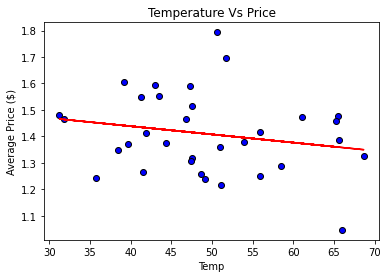

In [28]:
plt.scatter(city_avo_df['Temp'], city_avo_df['AveragePrice'], marker= 'o', color= 'blue',edgecolors='black')
plt.title('Temperature Vs Price')
plt.xlabel('Temp')
plt.ylabel('Average Price ($)')
x_values = city_avo_df['Temp']
y_values = city_avo_df['AveragePrice']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_avo_df['Temp'], city_avo_df['AveragePrice'])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values, regress_values, 'r-')
print(f'The line equation is {line_eq}')
print(f'The r-Squared is {r_squared}')